In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
import plotly as pl
import datetime as dt
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('noshow2.csv')

In [5]:
df.columns=df.columns.str.lower()
df.drop('patientid',axis=1)
df['age_bin']=pd.cut(df['age'],[0,10,20,30,40,50,60,70,80,90,120],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-120'])

In [6]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df['time_diff']=(df['appointmentday']-df['scheduledday']).dt.days.abs()
df['day']=df['appointmentday'].dt.dayofweek
df['day'].value_counts()
day_names=['monday','tuesday','wednesday','thursday','friday','saturday']

In [7]:
df['time_diff'].describe()

count    110527.000000
mean          9.881775
std          14.812349
min           0.000000
25%           1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: time_diff, dtype: float64

In [8]:
df['time_bins']=pd.cut(df['time_diff'],[0,1,3,14,178],labels=['0-1','1-3','3-14','14-178'])

In [ ]:
#df['show_val'] = df['no-show'].map({'Yes': 'red', 'No': 'blue'})
#vallist=df['show_val'].tolist()
#df.plot('time_diff','age', c=vallist, kind='scatter',figsize=(50,50))

In [9]:
total_samp=df.count()[0]
total_ns=df.groupby(['no-show']).gender.count()[1]
total_sh=df.groupby(['no-show']).gender.count()[0]
total_sh
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_bin,time_diff,day,time_bins
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-70,1,4,0-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-60,1,4,0-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-70,1,4,0-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-10,1,4,0-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-60,1,4,0-1


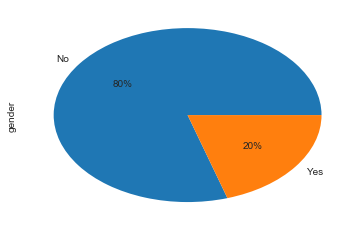

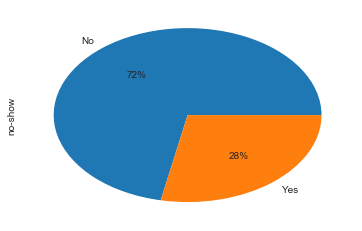

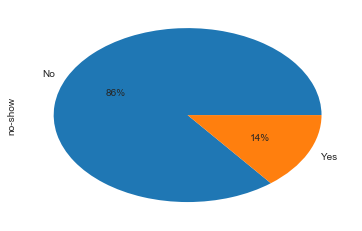

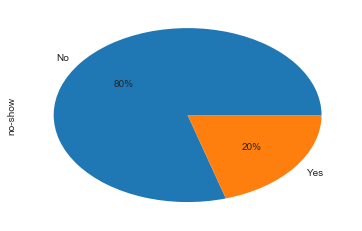

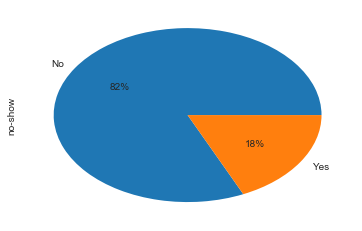

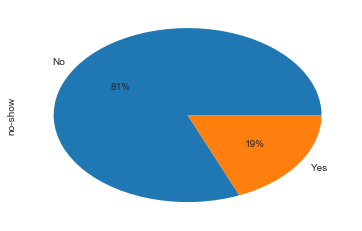

In [10]:
df.groupby(['no-show']).gender.count().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['alcoholism','scholarship']).get_group((1,1))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['diabetes','handcap']).get_group((1,1))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['diabetes','handcap']).get_group((0,0))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['diabetes','handcap']).get_group((1,0))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['diabetes','handcap']).get_group((0,1))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
#df.groupby(['sms_received']).get_group((1))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')

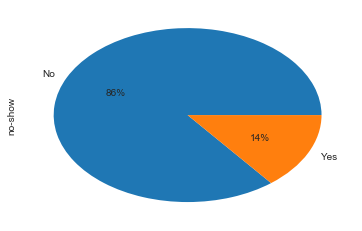

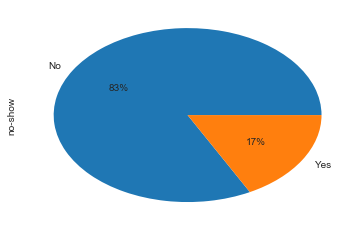

In [15]:
df.groupby(['diabetes','handcap','scholarship','hipertension','alcoholism','age_bin']).get_group((1,0,1,0,0,'60-70'))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby(['hipertension']).get_group((1))['no-show'].value_counts().plot(kind='pie',autopct='%1.0f%%')
py.show()

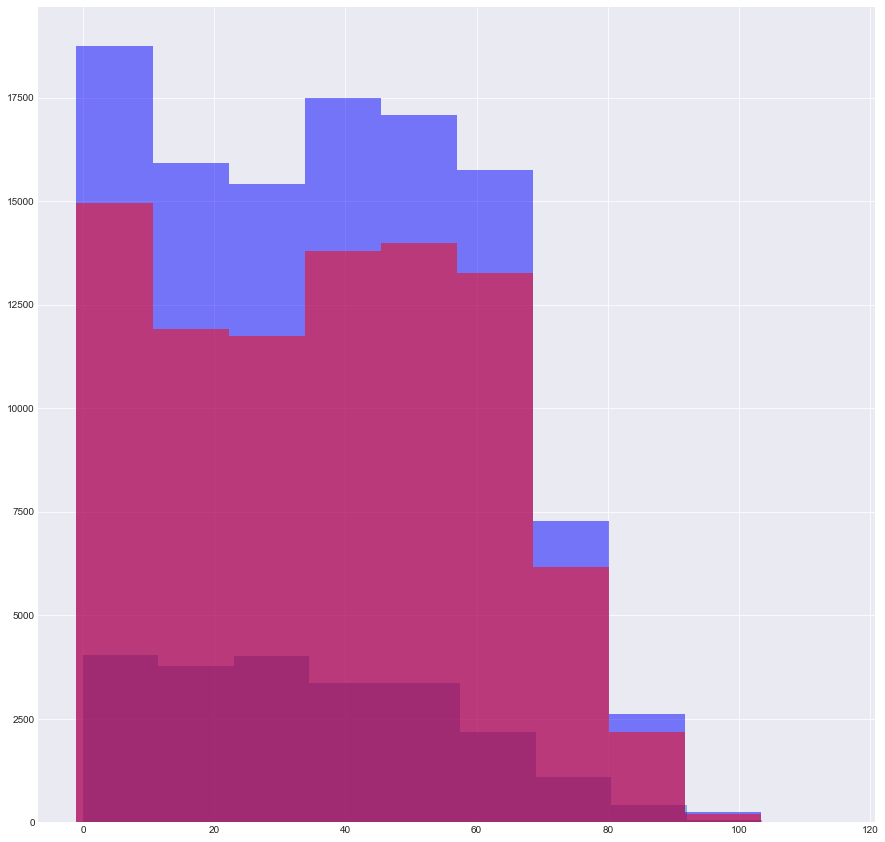

In [16]:
df.groupby(['no-show']).get_group('Yes')['age'].hist(figsize=(15,15),alpha=.5)
df['age'].hist(color='blue', alpha=.5)
df.groupby(['no-show']).get_group('No')['age'].hist(color='red',alpha=.5)

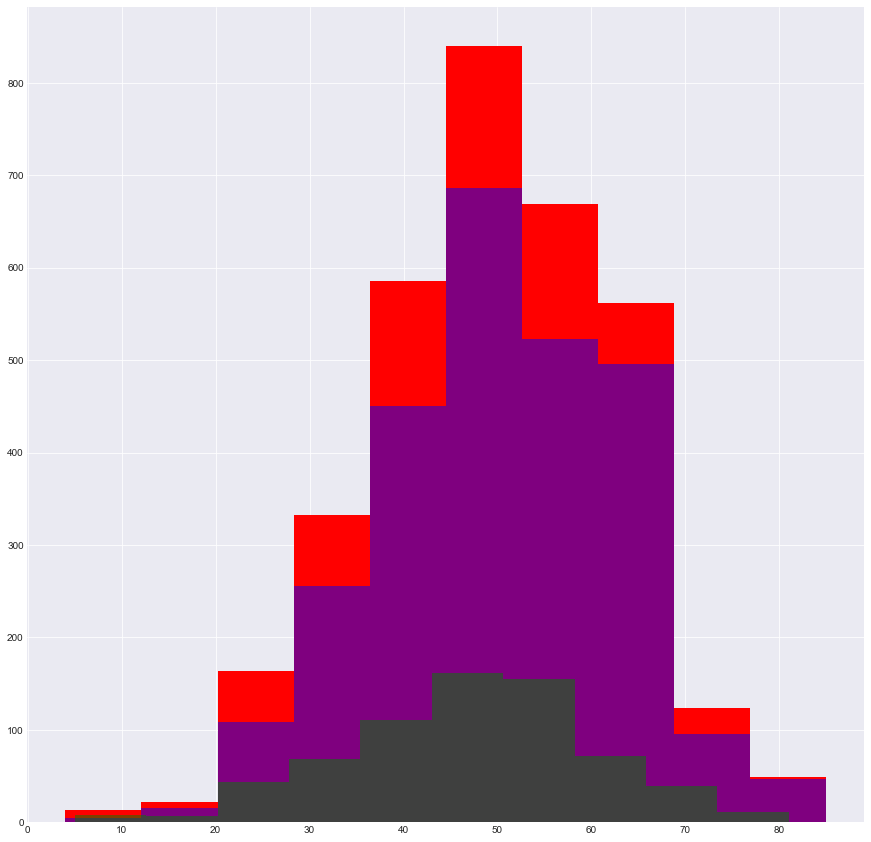

In [17]:
df.groupby(['alcoholism']).get_group(1)['age'].hist(color='red',figsize=(15,15))
df.groupby(['no-show','alcoholism']).get_group(('No',1))['age'].hist(alpha=.5,color='blue')
df.groupby(['no-show','alcoholism']).get_group(('Yes',1))['age'].hist(alpha=.5,color='green')


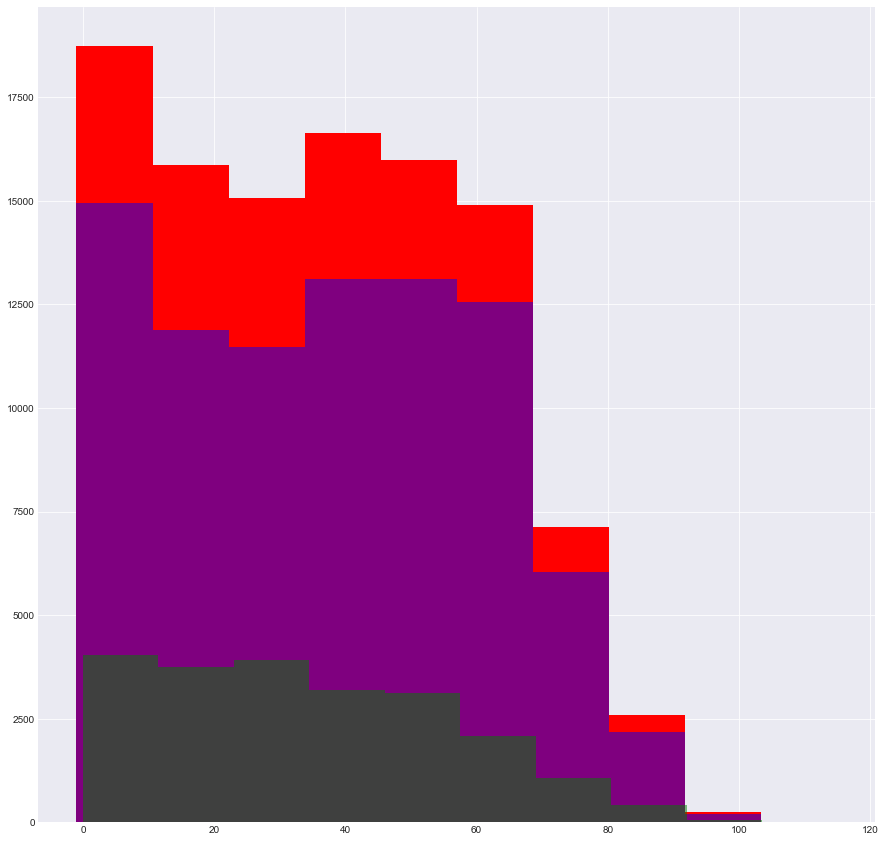

In [18]:
df.groupby(['alcoholism']).get_group(0)['age'].hist(color='red',figsize=(15,15))
df.groupby(['no-show','alcoholism']).get_group(('No',0))['age'].hist(alpha=.5,color='blue')
df.groupby(['no-show','alcoholism']).get_group(('Yes',0))['age'].hist(alpha=.5,color='green')


df.groupby(['alcoholism']).get_group(1)['age'].hist(color='red',density=True,figsize=(8,8))
py.show()
df.groupby(['no-show','alcoholism']).get_group(('No',1))['age'].hist(alpha=.5,density=True,color='blue')
py.show()
df.groupby(['no-show','alcoholism']).get_group(('Yes',1))['age'].hist(alpha=.5,density=True,color='green')


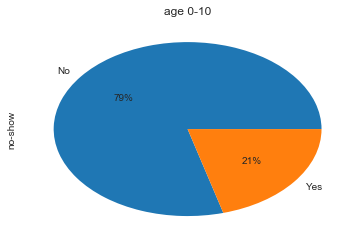

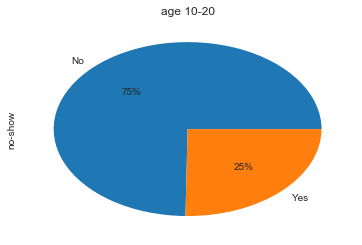

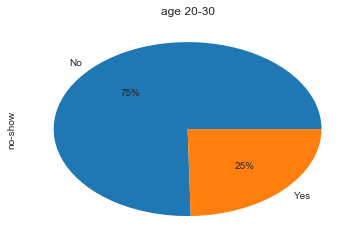

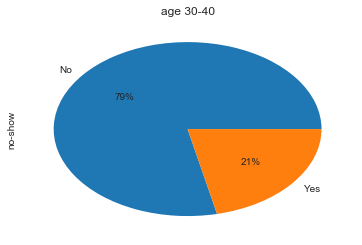

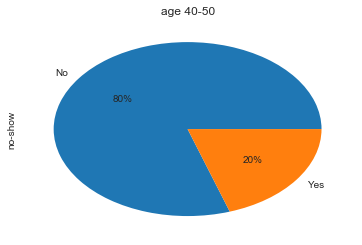

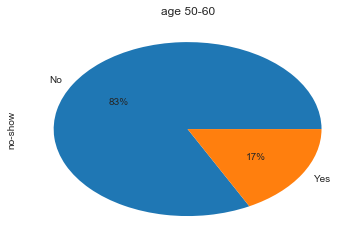

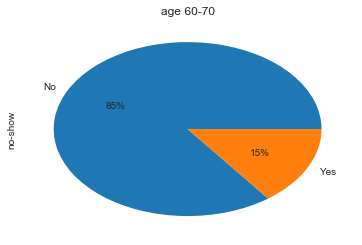

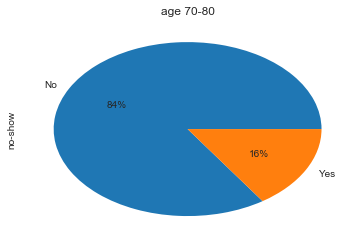

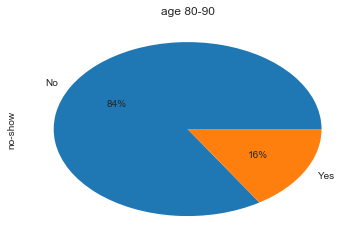

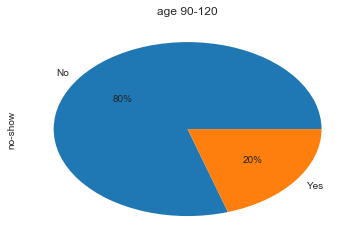

In [21]:
#df.groupby('no-show').get_group('Yes')['age'].plot(kind='box')
#py.show()
ind_len=len(df.groupby('age_bin')['no-show'].value_counts().index.levels[0])

for i in range(ind_len):
    ind_in=df.groupby('age_bin')['no-show'].value_counts().index.levels[0][i]
    plo=df.groupby('age_bin')['no-show'].value_counts()[ind_in].plot(kind='pie',autopct='%1.0f%%')
    plo.set_title('age '+ind_in)
    py.show()





In [ ]:
pat_show=df.groupby('no-show').get_group('Yes')['patientid'].value_counts().rename('noshows')
pat_no=df.groupby('no-show').get_group('No')['patientid'].value_counts().rename('shows')
combi=pd.concat([pat_show, pat_no], axis=1).fillna(0)
combi['sum']=combi['noshows'].add(combi['shows'])
combi['noshow_percent']=combi['noshows'].div(combi['sum'])
combi.sort_values('noshows', ascending=False)
print(combi.info())
mask=combi['noshows']>0
combi[mask].info()
combi[mask].shows.sum()

In [22]:
ind_len=len(df.groupby('day')['no-show'].value_counts().index.levels[0])
ind_len

6

C:\Users\thebl\Anaconda3\lib\site-packages\pandas\core\indexes\multi.py:860: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



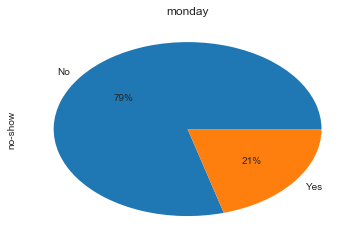

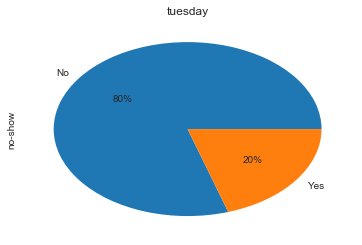

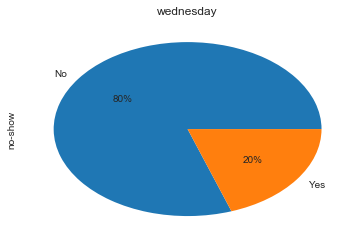

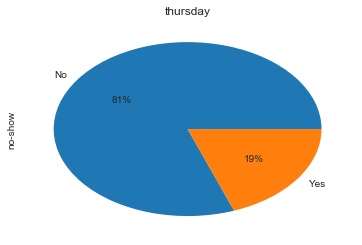

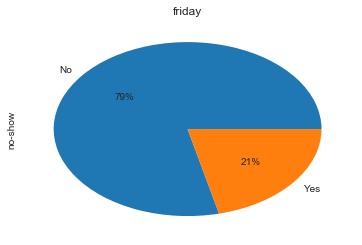

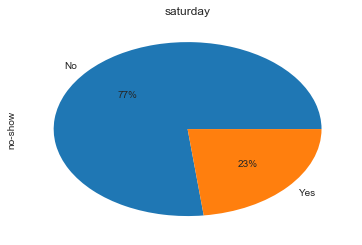

In [23]:

ind_len=len(df.groupby('day')['no-show'].value_counts().index.levels[0])

for i in range(ind_len):
    ind_in=df.groupby('day')['no-show'].value_counts().index.levels[0][i]
    plo=df.groupby('day')['no-show'].value_counts()[ind_in].plot(kind='pie',autopct='%1.0f%%')
    plo.set_title(day_names[i])
    py.show()

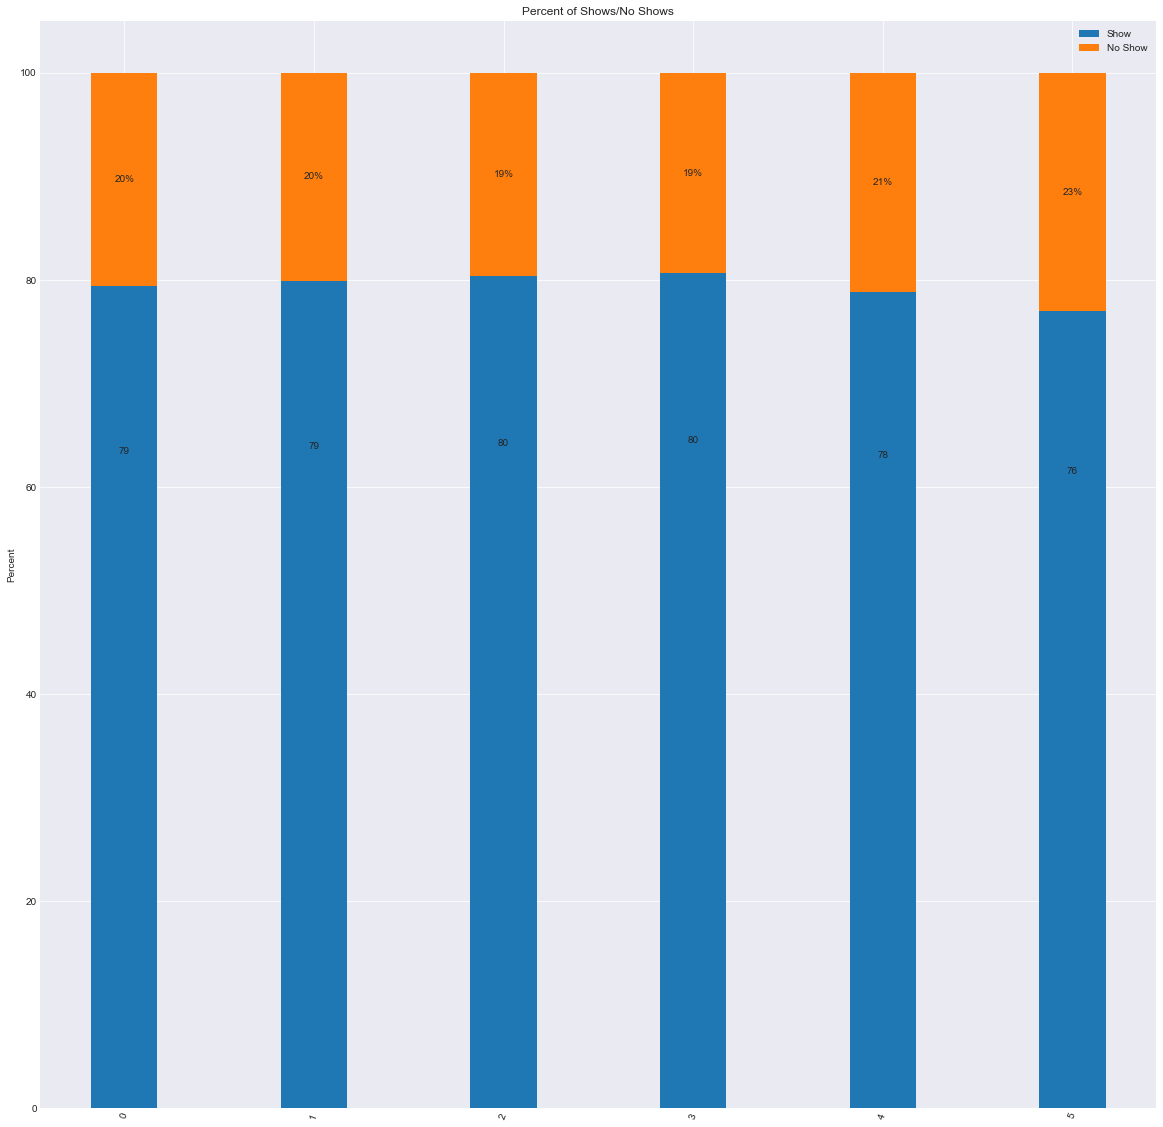

In [41]:
l_sum=df.groupby('day')['no-show'].value_counts()
l_sum=norm_me(l_sum.astype(float))
plot_bars(l_sum)

l_sum=df.groupby('day')['no-show'].value_counts()[0].sum()
new_v=df.groupby('day')['no-show'].value_counts()[0].div(l_sum)
new_v

ind_len=len(df.groupby('day')['no-show'].value_counts().index.levels[0])

for i in range(ind_len):
    ind_in=df.groupby('day')['no-show'].value_counts().index.levels[0][i]
    l_sum=df.groupby('day')['no-show'].value_counts()[ind_in].sum()
    new_v=df.groupby('day')['no-show'].value_counts()[ind_in].div(l_sum)
    plo=new_v.plot(kind='bar',stacked=False)
    plo.set_title(day_names[i])


In [42]:
day_names2=[name.title() for name in day_names]
day_names2

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [45]:
new_df2=df.groupby('age_bin')['no-show'].value_counts().copy().astype(float)
for i in new_df2.index.levels[0]:
    vals=sum(new_df2[i])
    new_df2[i]=new_df2[i].div(vals)
new_df2=new_df2.mul(100)
new_df2

age_bin  no-show
0-10     No         79.296515
         Yes        20.703485
10-20    No         74.746164
         Yes        25.253836
20-30    No         75.375463
         Yes        24.624537
30-40    No         78.527770
         Yes        21.472230
40-50    No         80.097087
         Yes        19.902913
50-60    No         82.625631
         Yes        17.374369
60-70    No         85.271249
         Yes        14.728751
70-80    No         84.460759
         Yes        15.539241
80-90    No         84.001572
         Yes        15.998428
90-120   No         79.870130
         Yes        20.129870
Name: no-show, dtype: float64

79.29651545036161
74.74616382929995
75.37546252630052
78.52777039596067
80.09708737864078
82.6256305472192
85.27124854768076
84.46075860863486
84.00157232704403
79.87012987012987
20.703484549638397
25.253836170700055
24.624537473699483
21.47222960403933
19.902912621359224
17.374369452780794
14.72875145231924
15.539241391365147
15.998427672955975
20.12987012987013


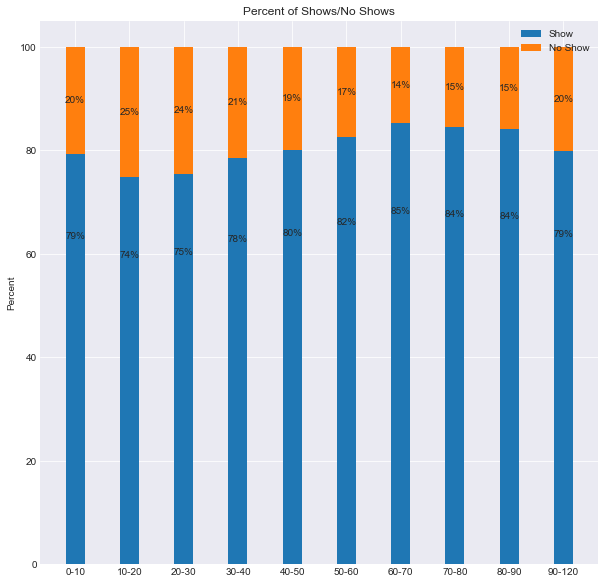

In [46]:


N = 10


no_show2 = new_df2.groupby('no-show').get_group('Yes').values
shows2 = new_df2.groupby('no-show').get_group('No').values
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = py.subplots(figsize=(10,10))

rects12 = ax.bar(ind, shows2, width)

rects22 = ax.bar(ind, no_show2, width, bottom=shows2)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of Shows/No Shows')
ax.set_xticks(ind)
ax.set_xticklabels(new_df2.index.levels[0].values.tolist())

ax.legend((rects12[0], rects22[0]), ('Show', 'No Show'))


def autolabel12(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        
        height = rect.get_height()
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2., .8*height,
                '%d' % int(height)+'%',
                ha='center', va='center')
        
def autolabel22(rects):
    """
    Attach a text label above each bar displaying its height
    """
    i=0
    for rect in rects:
        height = rect.get_height()
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2., .5*height+shows2[i],
                '%d' % int(height)+'%',
                ha='center', va='center')
        i+=1

autolabel12(rects12)
autolabel22(rects22)

py.show()

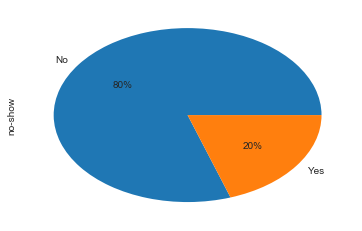

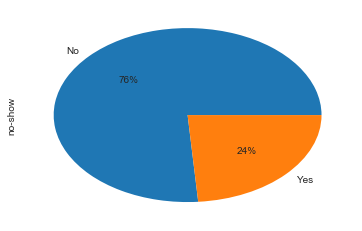

In [47]:
df.groupby('scholarship')['no-show'].value_counts()[0].plot(kind='pie',autopct='%1.0f%%')
py.show()
df.groupby('scholarship')['no-show'].value_counts()[1].plot(kind='pie',autopct='%1.0f%%')

79.29651545036161
74.74616382929995
75.37546252630052
78.52777039596067
80.09708737864078
82.6256305472192
85.27124854768076
84.46075860863486
84.00157232704403
79.87012987012987
20.703484549638397
25.253836170700055
24.624537473699483
21.47222960403933
19.902912621359224
17.374369452780794
14.72875145231924
15.539241391365147
15.998427672955975
20.12987012987013


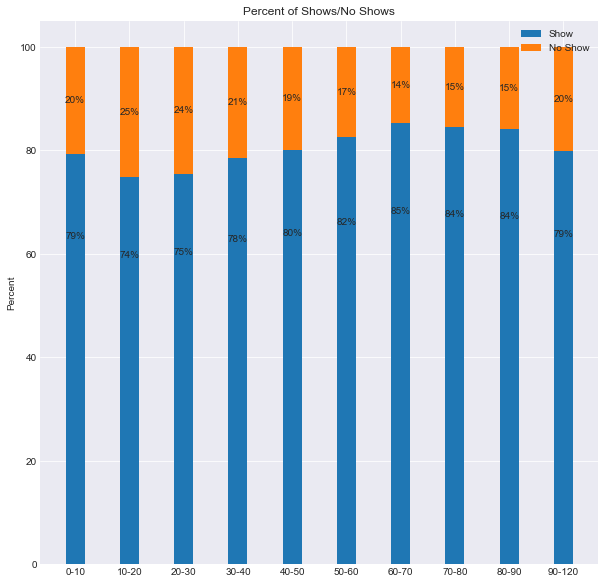

In [48]:
N = 10


no_show2 = new_df2.groupby('no-show').get_group('Yes').values
shows2 = new_df2.groupby('no-show').get_group('No').values
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = py.subplots(figsize=(10,10))

rects12 = ax.bar(ind, shows2, width)

rects22 = ax.bar(ind, no_show2, width, bottom=shows2)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent of Shows/No Shows')
ax.set_xticks(ind)
ax.set_xticklabels(new_df2.index.levels[0].values.tolist())

ax.legend((rects12[0], rects22[0]), ('Show', 'No Show'))


def autolabel12(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        
        height = rect.get_height()
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2., .8*height,
                '%d' % int(height)+'%',
                ha='center', va='center')
        
def autolabel22(rects):
    """
    Attach a text label above each bar displaying its height
    """
    i=0
    for rect in rects:
        height = rect.get_height()
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2., .5*height+shows2[i],
                '%d' % int(height)+'%',
                ha='center', va='center')
        i+=1

autolabel12(rects12)
autolabel22(rects22)

py.show()

In [49]:
scholgr=df.groupby(['scholarship','age_bin'])['no-show'].value_counts()[1].copy().astype(float)
scholgr=norm_me(scholgr)
scholgr

age_bin  no-show
0-10     No          76.808266
         Yes         23.191734
10-20    No          73.484419
         Yes         26.515581
20-30    No          72.545561
         Yes         27.454439
30-40    No          76.676148
         Yes         23.323852
40-50    No          77.918935
         Yes         22.081065
50-60    No          77.976818
         Yes         22.023182
60-70    No          82.687927
         Yes         17.312073
70-80    No          91.208791
         Yes          8.791209
80-90    No         100.000000
Name: no-show, dtype: float64

In [26]:

def norm_me(df):
#This function normalizes the values into a percentage"""
    for i in df.index.levels[0]:
        vals=sum(df[i])
        df[i]=df[i].div(vals)
    df=df.mul(100)
    return(df)


age_bin  no-show
0-10     No          76.808266
         Yes         23.191734
10-20    No          73.484419
         Yes         26.515581
20-30    No          72.545561
         Yes         27.454439
30-40    No          76.676148
         Yes         23.323852
40-50    No          77.918935
         Yes         22.081065
50-60    No          77.976818
         Yes         22.023182
60-70    No          82.687927
         Yes         17.312073
70-80    No          91.208791
         Yes          8.791209
80-90    No         100.000000
Name: no-show, dtype: float64

In [50]:
scholgr.loc[('80-90','Yes')]=0
scholgr.loc[('90-120','Yes')]=0
scholgr.loc[('90-120','No')]=0

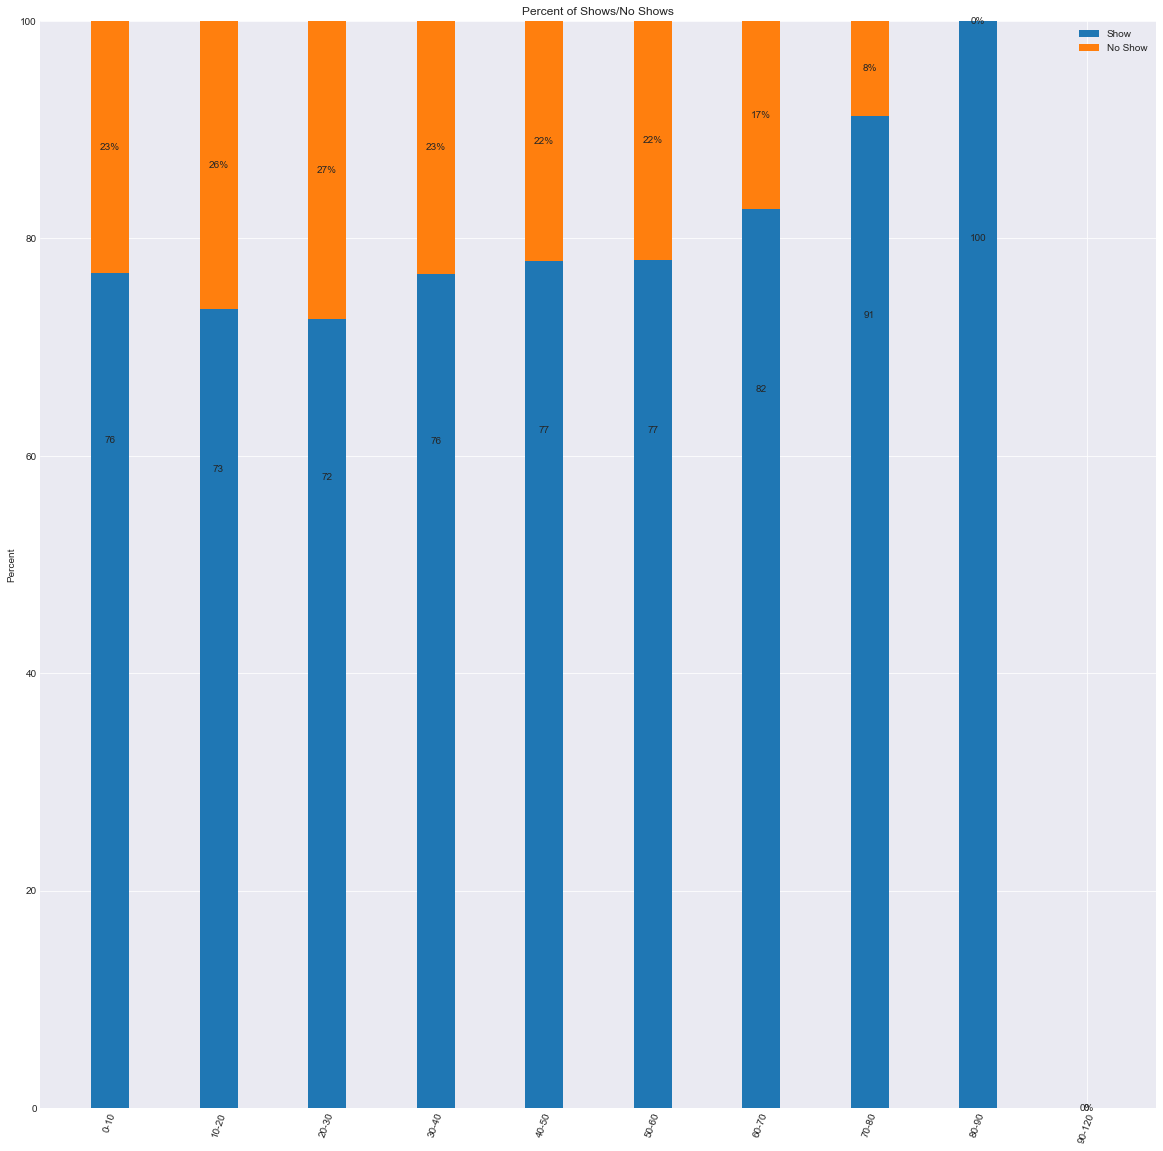

In [36]:
def plot_bars(df,inv=0,lab=0):
    df.fillna(0)

    #Set the number of bars, based on the plotting index.
    if inv==0:
        N = len(df.index.levels[0])
    else:
        N=inv
    if lab==0:
        ticks=df.index.levels[0].values.tolist()
    else:
        ticks=lab
    #obtain values for the bars
    no_show = df.groupby('no-show').get_group('Yes').values
    shows = df.groupby('no-show').get_group('No').values

    ind = np.arange(N)  # the x locations for the groups
  
    width = 0.35       # the width of the bars

    fig, ax = py.subplots(figsize=(20,20))
    
    py.xticks(rotation=70)
    rects1 = ax.bar(ind, shows, width)

    rects2 = ax.bar(ind, no_show, width, bottom=shows)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percent')
    ax.set_title('Percent of Shows/No Shows')
    ax.set_xticks(ind)
    ax.set_xticklabels(ticks)

    ax.legend((rects1[0], rects2[0]), ('Show', 'No Show'))


    def autolabel1(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:

            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., .8*height,
                    '%d' % int(height),
                    ha='center', va='center')

    def autolabel2(rects):
        """
        Attach a text label above each bar displaying its height, this one accounts for the stack height
        """
        i=0
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., .5*height+shows[i],
                    '%d' % int(height)+'%',
                    ha='center', va='center')
            i+=1

    autolabel1(rects1)
    autolabel2(rects2)

    py.show()
    
plot_bars(scholgr)

In [51]:
schol2=df.groupby(['scholarship','age_bin','day'])['no-show'].value_counts()

In [52]:
df['hour']=df['appointmentday'].dt.hour

In [54]:
dfn=df.groupby('neighbourhood')['no-show'].value_counts().copy().astype(float)
norm_me(dfn)
dfn.groupby('no-show').get_group('Yes').sort_values(axis=0, ascending=False)

neighbourhood                no-show
ILHAS OCEÂNICAS DE TRINDADE  Yes        1.000000
SANTOS DUMONT                Yes        0.289185
SANTA CECÍLIA                Yes        0.274554
SANTA CLARA                  Yes        0.264822
ITARARÉ                      Yes        0.262664
JESUS DE NAZARETH            Yes        0.243954
HORTO                        Yes        0.240000
ILHA DO PRÍNCIPE             Yes        0.234775
CARATOÍRA                    Yes        0.230409
ANDORINHAS                   Yes        0.230327
PRAIA DO SUÁ                 Yes        0.228261
GURIGICA                     Yes        0.225966
BENTO FERREIRA               Yes        0.224942
PARQUE MOSCOSO               Yes        0.223192
MARUÍPE                      Yes        0.222923
DO MOSCOSO                   Yes        0.222760
ENSEADA DO SUÁ               Yes        0.221277
ARIOVALDO FAVALESSA          Yes        0.219858
ILHA DAS CAIEIRAS            Yes        0.219421
FONTE GRANDE                 Yes

In [55]:
df.groupby('neighbourhood')['no-show'].value_counts()['SANTOS DUMONT']

no-show
No     907
Yes    369
Name: no-show, dtype: int64

In [56]:
df.groupby(['neighbourhood','time_bins'])['no-show'].value_counts()['SANTOS DUMONT']

time_bins  no-show
0-1        No         400
           Yes         83
1-3        No          51
           Yes         25
3-14       No         187
           Yes         87
14-178     No         226
           Yes        161
Name: no-show, dtype: int64

In [57]:
workn=df.groupby('neighbourhood').get_group('SANTOS DUMONT')
workn.groupby(['age_bin','sms_received']).get_group(('20-30',1))['no-show'].value_counts()

No     32
Yes    26
Name: no-show, dtype: int64

In [58]:
#workn2=df.groupby(['neighbourhood','time_bins','age_bin','sms_received'])['no-show'].value_counts()['SANTOS DUMONT']
#workn2[['14-178']]
workn2p=df.groupby('neighbourhood').get_group('SANTOS DUMONT')
workn2p2=workn2p.groupby(['time_bins']).get_group('14-178')
workn2=workn2p2.groupby(['age_bin','sms_received'])['no-show'].value_counts()
workn2
#workn2[('90-10',0)]

age_bin  sms_received  no-show
0-10     0             No         12
                       Yes         9
         1             No         30
                       Yes        13
10-20    0             Yes        11
                       No          9
         1             No         16
                       Yes        15
20-30    0             No          8
                       Yes         7
         1             Yes        17
                       No         10
30-40    0             No         12
                       Yes         7
         1             No         20
                       Yes        16
40-50    0             No         13
                       Yes         9
         1             No         18
                       Yes        12
50-60    0             No         10
                       Yes         8
         1             No         14
                       Yes         8
60-70    0             No         11
                       Yes         8
       

In [60]:

#workn.groupby(['age_bin','sms_received','time_bins'])['no-show'].value_counts()
binlist=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-120']
for cc in binlist:
    workn2[cc]=norm_me(workn2[cc].astype(float))
#workn2=norm_me(workn2.astype(float))
workn2


age_bin  sms_received  no-show
0-10     0             No          57
                       Yes         42
         1             No          69
                       Yes         30
10-20    0             Yes         55
                       No          45
         1             No          51
                       Yes         48
20-30    0             No          53
                       Yes         46
         1             Yes         62
                       No          37
30-40    0             No          63
                       Yes         36
         1             No          55
                       Yes         44
40-50    0             No          59
                       Yes         40
         1             No          60
                       Yes         40
50-60    0             No          55
                       Yes         44
         1             No          63
                       Yes         36
60-70    0             No          57
                   

In [ ]:
workn2.index

In [64]:
ns=[57.0,
 42.0,
 69.0,
 30.0,
 55.0,
 45.0,
 51.0,
 48.0,
 53.0,
 46.0,
 62.0,
 37.0,
 63.0,
 36.0,
 55.0,
 44.0,
 59.0,
 40.0,
 60.0,
 40.0,
 55.0,
 44.0,
 63.0,
 36.0,
 57.0,
 42.0,
 75.0,
 24.0,
 0.0,
 100.0,
 30.0,
 70.0,
 100.0,
 0.0,
 83.0,
 16.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [66]:
newind=pd.MultiIndex(levels=[['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-120'], [0, 1], ['No', 'Yes']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7,7, 8, 8, 8, 8, 9, 9, 9, 9], [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['age_bin', 'sms_received', 'no-show'])
s = pd.Series(ns, index=newind)
#newar=['0-10','0-10','10-20','10-20','20-30','20-30','30-40','30-40','40-50','40-50','50-60','50-60','60-70','60-70','70-80','70-80','80-90','80-90','90-120','90-120']
#newar=['Y']

In [67]:
labp=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-120']
labp2=[]
for i in labp:
    labp2.append(i+' No SMS')
    labp2.append(i+ ' SMS')
labp2 


['0-10 No SMS',
 '0-10 SMS',
 '10-20 No SMS',
 '10-20 SMS',
 '20-30 No SMS',
 '20-30 SMS',
 '30-40 No SMS',
 '30-40 SMS',
 '40-50 No SMS',
 '40-50 SMS',
 '50-60 No SMS',
 '50-60 SMS',
 '60-70 No SMS',
 '60-70 SMS',
 '70-80 No SMS',
 '70-80 SMS',
 '80-90 No SMS',
 '80-90 SMS',
 '90-120 No SMS',
 '90-120 SMS']

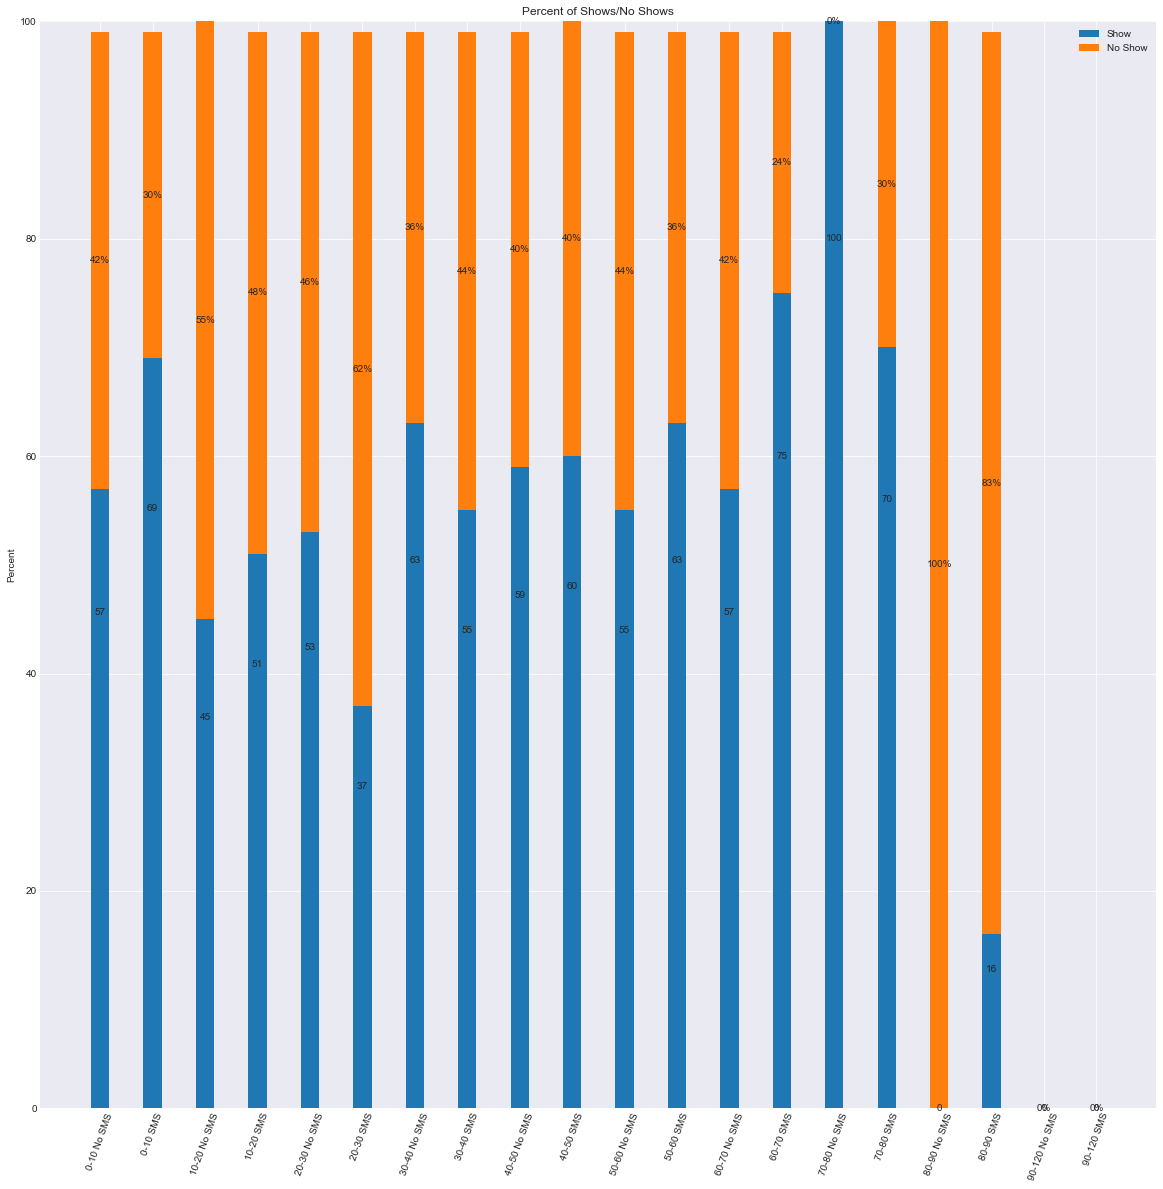

In [68]:

newn=len(s.groupby('no-show').get_group('Yes').values)

plot_bars(s,newn,labp2)

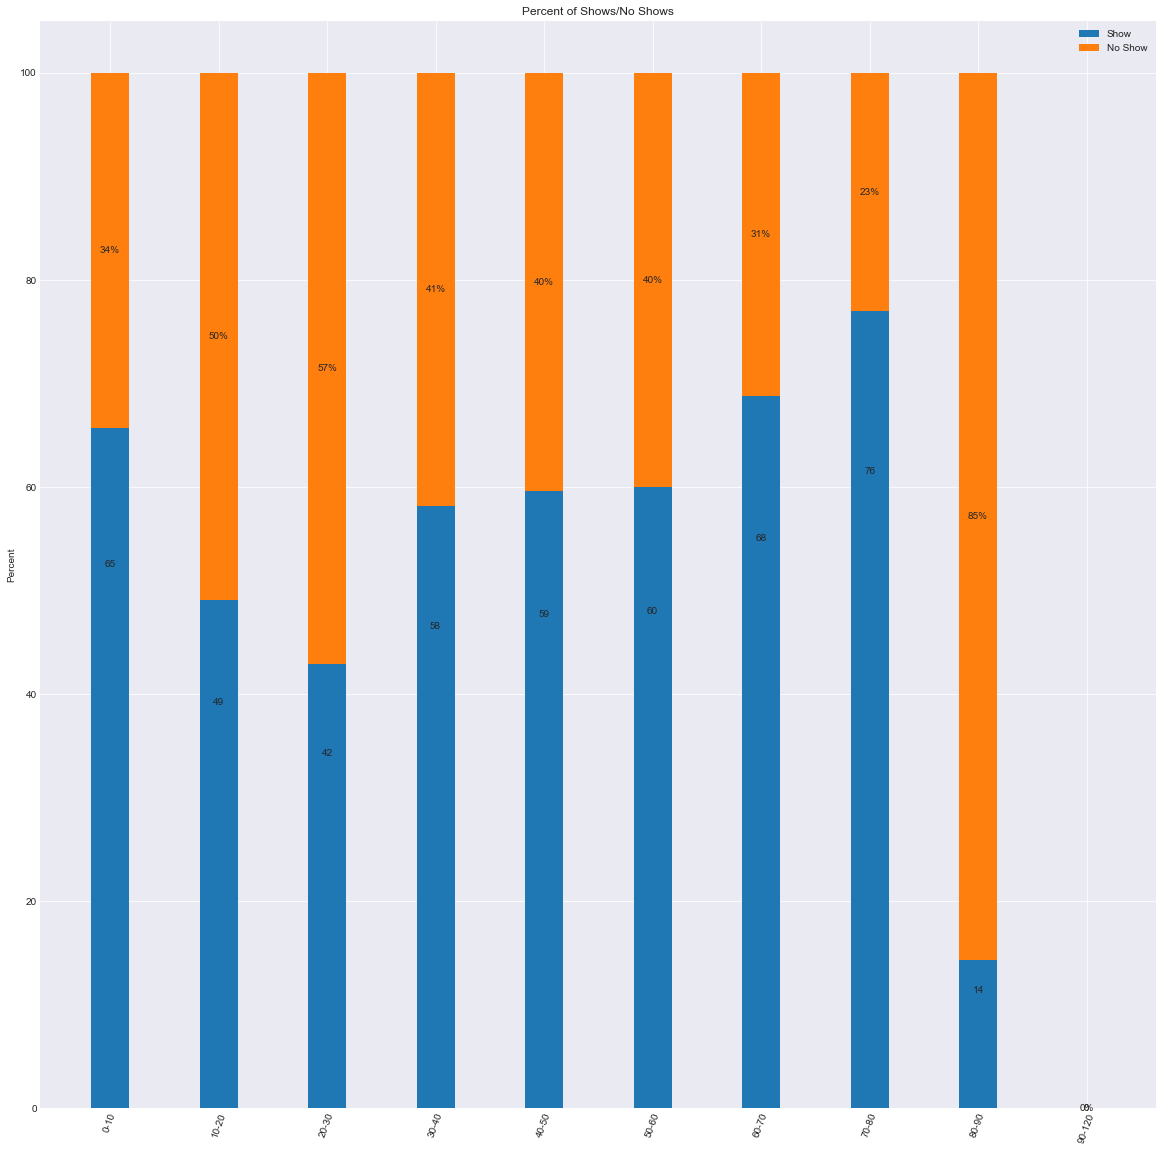

In [61]:
workn3=df.groupby(['neighbourhood','time_bins','age_bin'])['no-show'].value_counts()['SANTOS DUMONT']['14-178']
workn3=norm_me(workn3.astype(float))
workn3
workn3.loc[('90-120','No')]=0.0
workn3.loc[('90-120','Yes')]=0.0
plot_bars(workn3)

In [69]:
time_gr=df.groupby('time_bins')['no-show'].value_counts().astype(float)

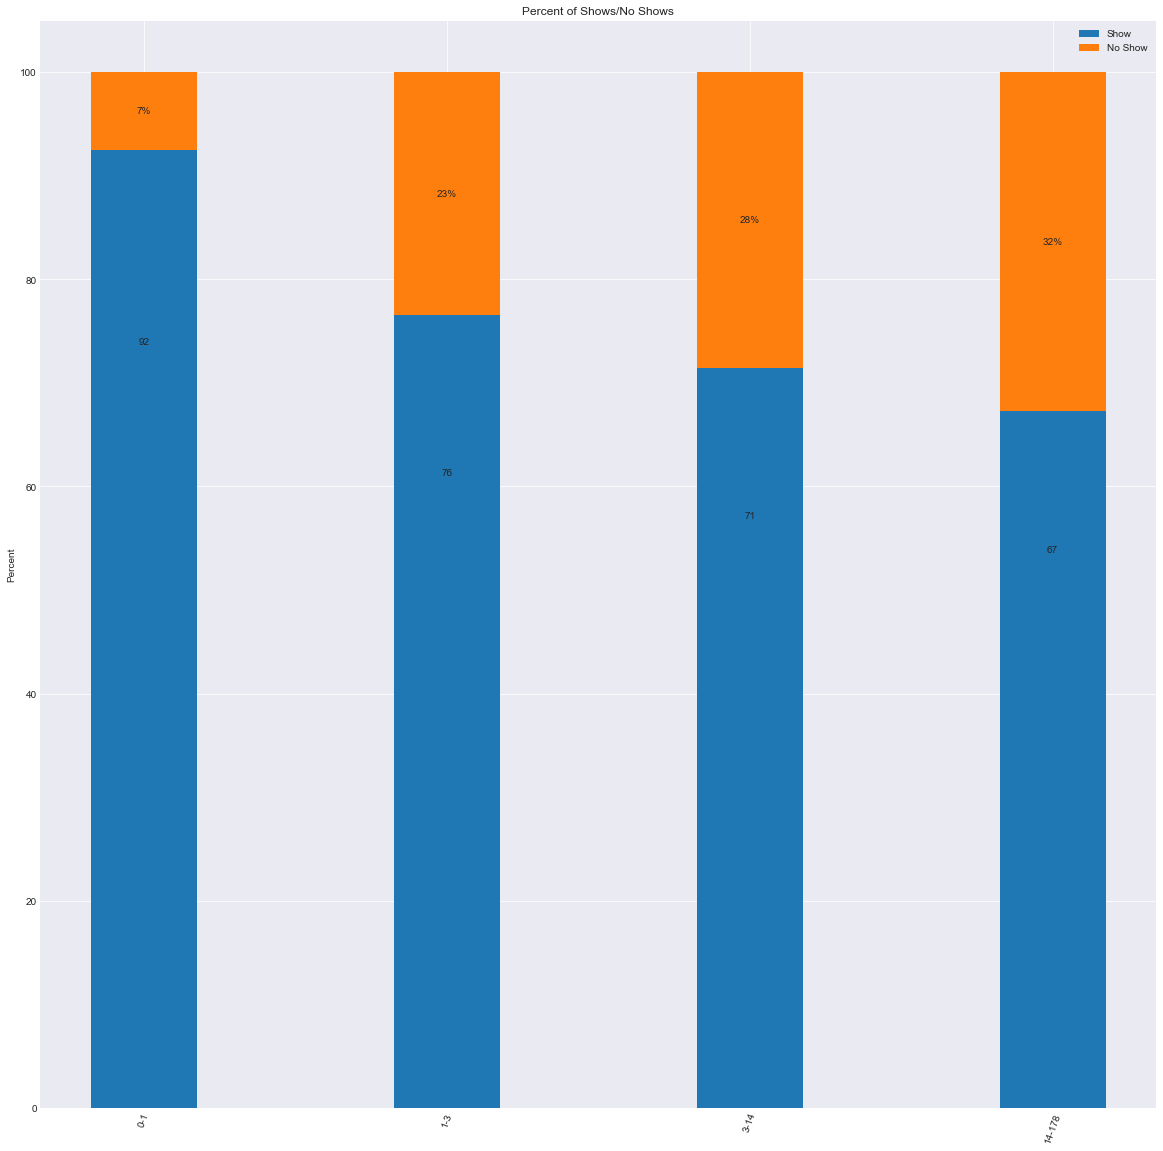

In [70]:
time_gr=norm_me(time_gr)
plot_bars(time_gr)